In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [2]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
images_train=np.load('/content/gdrive/My Drive/Colab Notebooks/images_testing.npy')
images_test=np.load('/content/gdrive/My Drive/Colab Notebooks/images_training.npy')
seg_train=np.load('/content/gdrive/My Drive/Colab Notebooks/seg_training.npy')
print(images_train.shape)
print(seg_train.shape)



(290, 160, 576, 3)
(289, 160, 576, 2)


(160, 576)


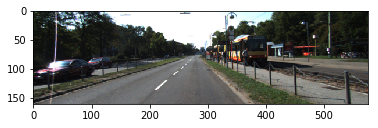

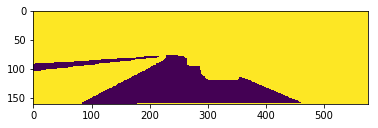

In [60]:
print(seg_train[0][:,:,1].shape)
plt.imshow(images_train[4])
plt.show()
plt.imshow(seg_train[8][:,:,0])
plt.show()

In [5]:
model=VGG16(weights='imagenet')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

In [0]:
vgg16_weight=model.get_weights()

weight={'conv1_1':tf.constant(vgg16_weight[0]),
       'conv1_2':tf.constant(vgg16_weight[2]),
       'conv2_1':tf.constant(vgg16_weight[4]),
       'conv2_2':tf.constant(vgg16_weight[6]),
       'conv3_1':tf.constant(vgg16_weight[8]),
       'conv3_2':tf.constant(vgg16_weight[10]),
       'conv3_3':tf.constant(vgg16_weight[12]),
       'conv4_1':tf.constant(vgg16_weight[14]),
       'conv4_2':tf.constant(vgg16_weight[16]),
       'conv4_3':tf.constant(vgg16_weight[18]),
       'conv5_1':tf.constant(vgg16_weight[20]),
       'conv5_2':tf.constant(vgg16_weight[22]),
       'conv5_3':tf.constant(vgg16_weight[24])}

bias={'conv1_1':tf.constant(vgg16_weight[1]),
       'conv1_2':tf.constant(vgg16_weight[3]),
       'conv2_1':tf.constant(vgg16_weight[5]),
       'conv2_2':tf.constant(vgg16_weight[7]),
       'conv3_1':tf.constant(vgg16_weight[9]),
       'conv3_2':tf.constant(vgg16_weight[11]),
       'conv3_3':tf.constant(vgg16_weight[13]),
       'conv4_1':tf.constant(vgg16_weight[15]),
       'conv4_2':tf.constant(vgg16_weight[17]),
       'conv4_3':tf.constant(vgg16_weight[19]),
       'conv5_1':tf.constant(vgg16_weight[21]),
       'conv5_2':tf.constant(vgg16_weight[23]),
       'conv5_3':tf.constant(vgg16_weight[25])}

In [7]:
for w in vgg16_weight:
  print(w.shape)

(3, 3, 3, 64)
(64,)
(3, 3, 64, 64)
(64,)
(3, 3, 64, 128)
(128,)
(3, 3, 128, 128)
(128,)
(3, 3, 128, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(25088, 4096)
(4096,)
(4096, 4096)
(4096,)
(4096, 1000)
(1000,)


In [0]:
def build_model(x,weight,bias):
  conv1_1=tf.nn.conv2d(input=x,filter=weight['conv1_1'],strides=[1,1,1,1],padding='SAME')
  conv1_1=tf.nn.relu(conv1_1+bias['conv1_1'])
  conv1_2=tf.nn.conv2d(input=conv1_1,filter=weight['conv1_2'],strides=[1,1,1,1],padding='SAME')
  conv1_2=tf.nn.relu(conv1_2+bias['conv1_2'])
  maxp1=tf.layers.max_pooling2d(inputs=conv1_2,pool_size=[2,2],strides=(2,2)) # 80 288 128
  
  conv2_1=tf.nn.conv2d(input=maxp1,filter=weight['conv2_1'],strides=[1,1,1,1],padding='SAME')
  conv2_1=tf.nn.relu(conv2_1+bias['conv2_1'])
  conv2_2=tf.nn.conv2d(input=conv2_1,filter=weight['conv2_2'],strides=[1,1,1,1],padding='SAME')
  conv2_2=tf.nn.relu(conv2_2+bias['conv2_2'])
  maxp2=tf.layers.max_pooling2d(inputs=conv2_2,pool_size=[2,2],strides=(2,2)) # 40 144 256
  
  conv3_1=tf.nn.conv2d(input=maxp2,filter=weight['conv3_1'],strides=[1,1,1,1],padding='SAME')
  conv3_1=tf.nn.relu(conv3_1+bias['conv3_1'])
  conv3_2=tf.nn.conv2d(input=conv3_1,filter=weight['conv3_2'],strides=[1,1,1,1],padding='SAME')
  conv3_2=tf.nn.relu(conv3_2+bias['conv3_2'])
  conv3_3=tf.nn.conv2d(input=conv3_2,filter=weight['conv3_3'],strides=[1,1,1,1],padding='SAME')
  conv3_3=tf.nn.relu(conv3_3+bias['conv3_3'])
  maxp3=tf.layers.max_pooling2d(inputs=conv3_3,pool_size=[2,2],strides=(2,2))  # 20 72 512
  
  conv4_1=tf.nn.conv2d(input=maxp3,filter=weight['conv4_1'],strides=[1,1,1,1],padding='SAME')
  conv4_1=tf.nn.relu(conv4_1+bias['conv4_1'])
  conv4_2=tf.nn.conv2d(input=conv4_1,filter=weight['conv4_2'],strides=[1,1,1,1],padding='SAME')
  conv4_2=tf.nn.relu(conv4_2+bias['conv4_2'])
  conv4_3=tf.nn.conv2d(input=conv4_2,filter=weight['conv4_2'],strides=[1,1,1,1],padding='SAME')
  conv4_3=tf.nn.relu(conv4_3+bias['conv4_3'])
  maxp4=tf.layers.max_pooling2d(inputs=conv4_3,pool_size=[2,2],strides=(2,2)) # 10 36 512
  
  conv5_1=tf.nn.conv2d(input=maxp4,filter=weight['conv5_1'],strides=[1,1,1,1],padding='SAME')
  conv5_1=tf.nn.relu(conv5_1+bias['conv5_1'])
  conv5_2=tf.nn.conv2d(input=conv5_1,filter=weight['conv5_2'],strides=[1,1,1,1],padding='SAME')
  conv5_2=tf.nn.relu(conv5_2+bias['conv5_2'])
  conv5_3=tf.nn.conv2d(input=conv5_2,filter=weight['conv5_3'],strides=[1,1,1,1],padding='SAME')
  conv5_3=tf.nn.relu(conv5_3+bias['conv5_3'])
  maxp5=tf.layers.max_pooling2d(inputs=conv5_3,pool_size=[2,2],strides=(2,2)) # 5 18 512
  
  conv6=tf.layers.conv2d(inputs=maxp5,kernel_size=[7,7],filters=4096,activation=tf.nn.relu,padding='SAME',kernel_initializer=tf.initializers.glorot_normal()) # 5 18 4096
  #maxp6=tf.layers.max_pooling2d(conv6)
  
  conv7=tf.layers.conv2d(inputs=conv6,kernel_size=[1,1],filters=4096,activation=tf.nn.relu,padding='SAME',kernel_initializer=tf.initializers.glorot_normal()) # 5 18 4096
  conv8=tf.layers.conv2d(inputs=conv7,kernel_size=[1,1],filters=2,activation=tf.nn.relu,padding='SAME',kernel_initializer=tf.initializers.glorot_normal()) # 5 18 2
  dconv9=tf.layers.conv2d_transpose(inputs=conv8,filters=512,kernel_size=[4,4],strides=(2,2),activation=tf.nn.relu,padding='SAME',kernel_initializer=tf.initializers.glorot_normal())
  # 10 36 512
  dconv10=tf.layers.conv2d_transpose(inputs=dconv9+maxp4,filters=256,kernel_size=[4,4],strides=(2,2),activation=tf.nn.relu,padding='SAME',kernel_initializer=tf.initializers.glorot_normal())
  # 20 72 256
  dconv11=tf.layers.conv2d_transpose(inputs=dconv10+maxp3,filters=2,kernel_size=[8,8],strides=(8,8),activation=tf.nn.relu,padding='SAME',kernel_initializer=tf.initializers.glorot_normal())
  return dconv11

In [0]:
x=tf.placeholder(tf.float32,[None,160,576,3])
y=tf.placeholder(tf.float32,[None,160,576,2])

In [10]:
pred=build_model(x,weight,bias)
loss=tf.nn.softmax_cross_entropy_with_logits(logits=tf.reshape(pred,[-1,2]),labels=tf.reshape(y,[-1,2]))
loss=tf.reduce_mean(loss)
opt=tf.train.AdamOptimizer(0.001).minimize(loss)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
def get_batch(image,label,batch_size=16):
  idx=np.random.choice(label.shape[0],batch_size)
  return image[idx],label[idx]

In [70]:
for i in range(20):
  train_x,train_y=get_batch(images_train,seg_train)
  _,l=sess.run([opt,loss],feed_dict={x:train_x,y:train_y})
  print(l)

0.6461072
0.6417413
0.6430675
0.6355295
0.636778
0.6385783
0.6427475
0.640163
0.63889223
0.6306234
0.63714254
0.6389662
0.63030875
0.63763785
0.631256
0.6308731
0.63565385
0.6319525
0.628237
0.6334652


(160, 576, 1)


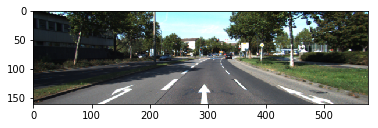

In [81]:
test_seg=sess.run(tf.nn.softmax(pred),feed_dict={x:images_test[3].reshape(1,160,-1,3)})
test_seg=test_seg[0,:,:,1]
seg=(test_seg>0.5).reshape(160,576,1)
#mask=np.dpt(seg,np.array([[0,255,0,127]]))
#mask=scipy.misc.toimage(mask,mode="RGBA")
#im=scipy.misc.toimage(image_test)
print(seg.shape)
plt.imshow(images_test[3].reshape(160,576,3))
plt.show()

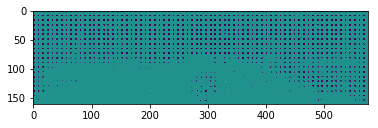

In [82]:
plt.imshow(test_seg.reshape(160,576))
plt.show()